# Filled Julia sets

MCS 275 Spring 2021 Lecture 27 - David Dumas

At the moment, this only contains the code I wrote during Lecture 27.  In the near future I may add some explanatory text.  The slides from Lecture 27 have more detail on the goals.

In [2]:
def g(x):
    return x*x

def f(x):
    return x*x-1

In [3]:
def orbit(func,a,n):
    L = [a]
    for _ in range(n):
        L.append(func(L[-1]))
    return L

In [4]:
orbit(g,2,5)

[2, 4, 16, 256, 65536, 4294967296]

In [5]:
orbit(f,0,8)  # 0 is in the filled Julia set

[0, -1, 0, -1, 0, -1, 0, -1, 0]

In [7]:
orbit(f,1,8) # 1 is in the filled Julia set

[1, 0, -1, 0, -1, 0, -1, 0, -1]

In [59]:
orbit(f,1.5,30)

[1.5,
 1.25,
 0.5625,
 -0.68359375,
 -0.5326995849609375,
 -0.7162311521824449,
 -0.4870129366434074,
 -0.7628183995419644,
 -0.418108089320236,
 -0.8251856256449815,
 -0.31906868322890036,
 -0.8981951753825757,
 -0.19324542691946411,
 -0.962656204974714,
 -0.07329303102368134,
 -0.9946281316033617,
 -0.010714879823205736,
 -0.9998851913503742,
 -0.00022960411822547933,
 -0.9999999472819489,
 -1.0543609951785271e-07,
 -0.9999999999999889,
 -2.220446049250313e-14,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0]

In [11]:
orbit(f,2,10)  # looks like 2 is not in the filled Julia set

[2,
 3,
 8,
 63,
 3968,
 15745023,
 247905749270528,
 61457260521381894004129398783,
 3776994870793005510047522464634252677140721938309041881088,
 14265690253996672387291309349232388828298289458234016200317876247121873778287073518355813134107244701354409532063743,
 203509918422975643131625101557493482417516581321177887486174612349689723637228095885608636916042736102424433936617827686729959884103612889121780011527849662844136145473332830301242513425767433130492258922182178369327277600615170048]

In [12]:
def bounded_orbit(func,a,maxiter=10):
    z = a
    for _ in range(maxiter):
        if abs(z) >= 2:
            return False
        z = func(z)
    return True

In [20]:
bounded_orbit(f,0.5+0.2j)

True

In [69]:
import numpy as np

x = np.linspace(-1.7,1.7,1500)
y = np.linspace(-1.7,1.7,1500)

xx, yy = np.meshgrid(x,y)

In [70]:
zz = xx+1j*yy

In [71]:
def f_bounded_orbit(a):
    return bounded_orbit(f,a,maxiter=150)

In [72]:
f_bounded_orbit(0.2+0.3j)

True

In [73]:
orbit_classification = np.vectorize(f_bounded_orbit)(zz)

In [65]:
from PIL import Image

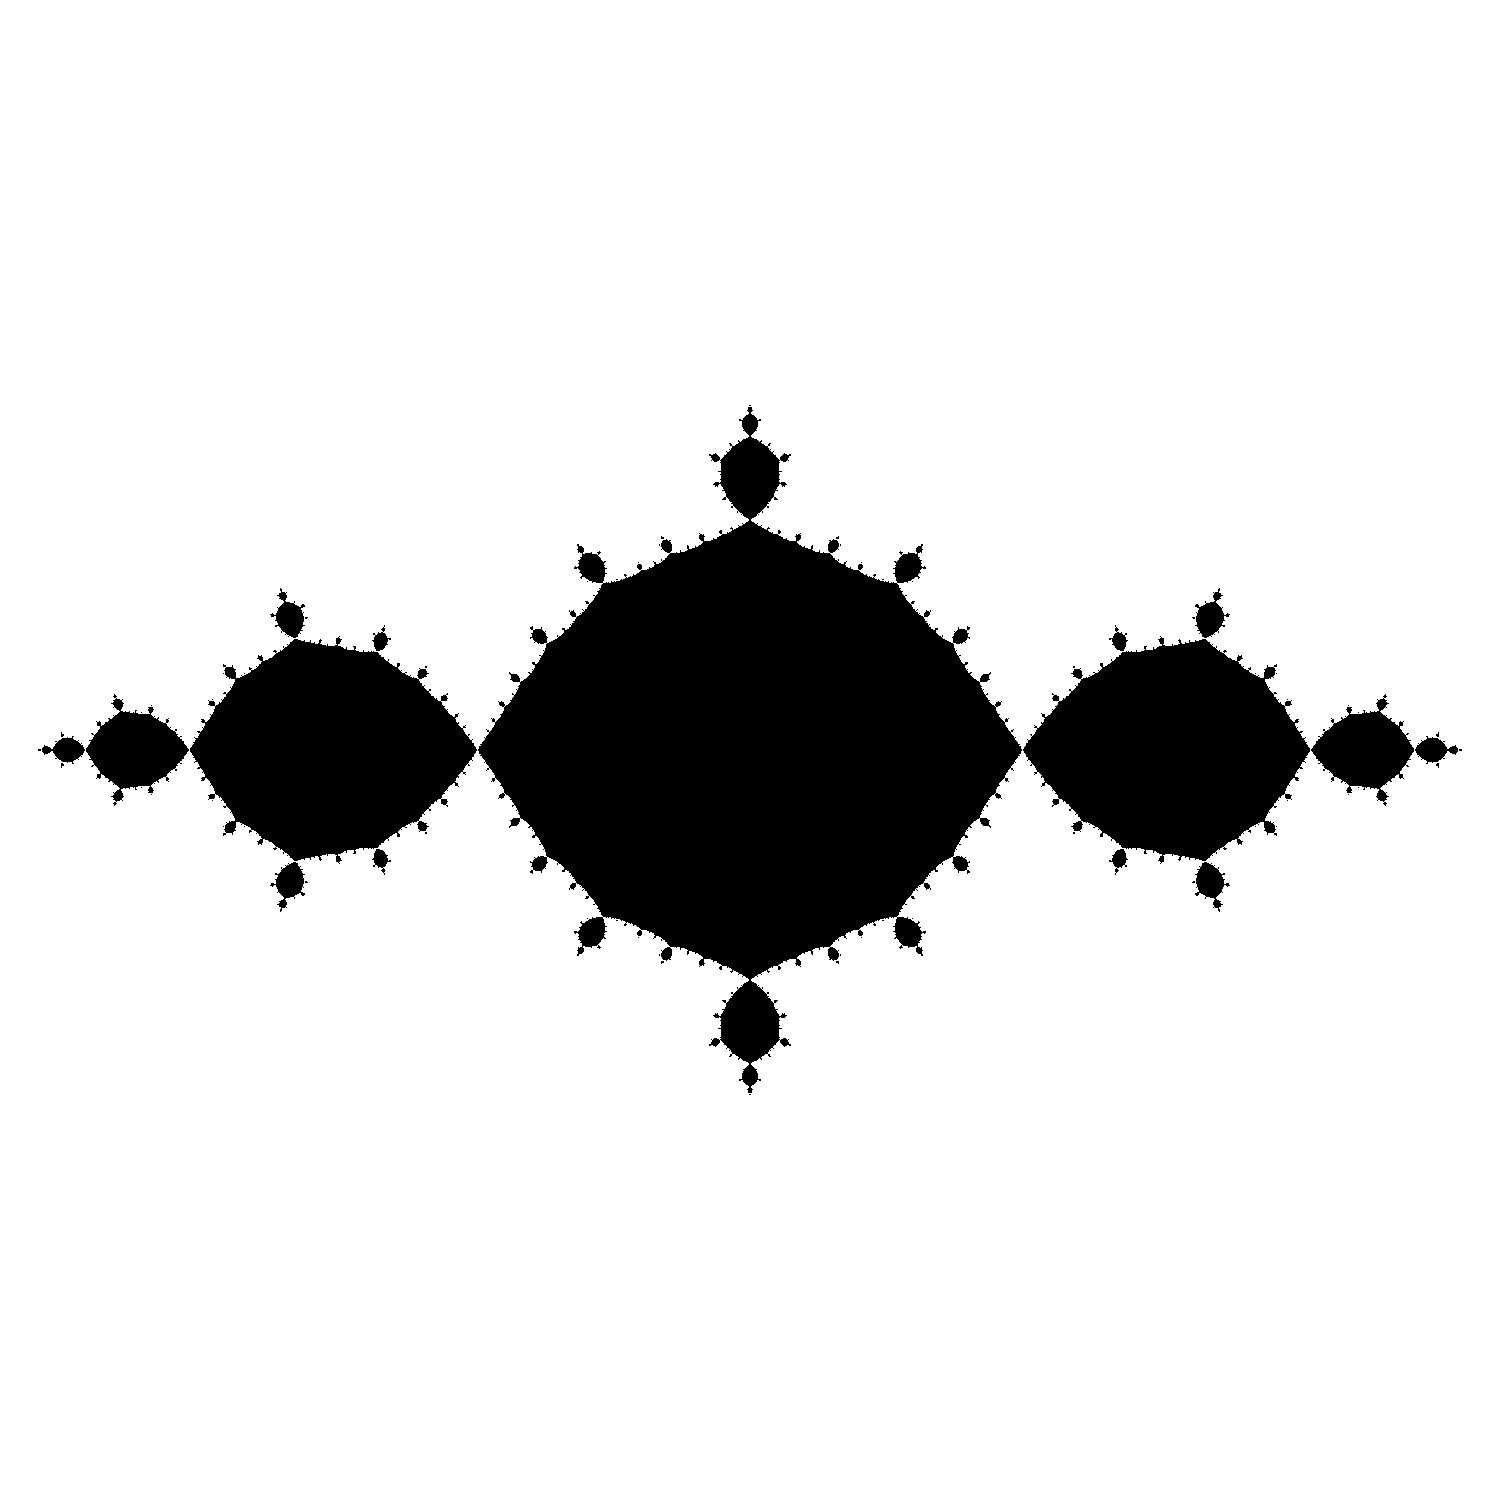

In [74]:
img = Image.fromarray(255*(1-orbit_classification.astype("uint8")),mode="L")
img

In [75]:
img.save("basilica.png")